In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


data = pd.read_csv("ıe423matchdata.csv", encoding='ISO-8859-1')  # Specify encoding to handle UnicodeDecodeError (Chatgpt 4o model was used in this part)

def calculate_control_limits(series, z=3):
    mean = np.mean(series)
    std_dev = np.std(series)
    upper_limit = mean + z * std_dev
    lower_limit = mean - z * std_dev
    return mean, upper_limit, lower_limit


interesting_matches = {}
for match_id in data['fixture_id'].unique():
    match_data = data[data['fixture_id'] == match_id]

    # Choose a metric (Ball Possession for now)
    ball_possession_home = match_data['Ball.Possession_home'].diff().dropna()
    ball_possession_away = match_data['Ball.Possession_away'].diff().dropna()

    mean_home, upper_limit_home, lower_limit_home = calculate_control_limits(ball_possession_home)
    mean_away, upper_limit_away, lower_limit_away = calculate_control_limits(ball_possession_away)

    # Detect significant shifts
    out_of_control_home = ((ball_possession_home > upper_limit_home) | (ball_possession_home < lower_limit_home)).sum()
    out_of_control_away = ((ball_possession_away > upper_limit_away) | (ball_possession_away < lower_limit_away)).sum()

    # Check if any events align with detected shifts
    events = match_data[['minute', 'Redcards_home', 'Redcards_away', 'Goals_home', 'Goals_away']].sum().sum()

    # Determine interest score for each match
    interest_score = out_of_control_home + out_of_control_away + events

    if interest_score > 0:
        interesting_matches[match_id] = interest_score

# Select the top 8 matches with the highest interest score
sorted_matches = sorted(interesting_matches.items(), key=lambda x: x[1], reverse=True)[:8]


significant_matches = pd.DataFrame(sorted_matches, columns=['fixture_id', 'interest_score'])
print(significant_matches)



   fixture_id  interest_score
0    19139711            5388
1    19135254            5331
2    19155178            5275
3    19134467            5224
4    19172053            5220
5    19135378            5214
6    19155103            5204
7    19172038            5174


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

data = pd.read_csv("ıe423matchdata.csv", encoding='ISO-8859-1')  


def calculate_control_limits(series, z=3):
    mean = np.mean(series)
    std_dev = np.std(series)
    upper_limit = mean + z * std_dev
    lower_limit = mean - z * std_dev
    return mean, upper_limit, lower_limit

interesting_matches = {}
for match_id in data['fixture_id'].unique():
    match_data = data[data['fixture_id'] == match_id]

    #(Successful Passes)
    successful_passes_home = match_data['Successful.Passes_home'].diff().dropna()
    successful_passes_away = match_data['Successful.Passes_away'].diff().dropna()

    
    mean_home, upper_limit_home, lower_limit_home = calculate_control_limits(successful_passes_home)
    mean_away, upper_limit_away, lower_limit_away = calculate_control_limits(successful_passes_away)

    
    out_of_control_home = ((successful_passes_home > upper_limit_home) | (successful_passes_home < lower_limit_home)).sum()
    out_of_control_away = ((successful_passes_away > upper_limit_away) | (successful_passes_away < lower_limit_away)).sum()

   
    events = match_data[['minute', 'Redcards_home', 'Redcards_away', 'Goals_home', 'Goals_away']].sum().sum()

    
    interest_score = out_of_control_home + out_of_control_away + events

    if interest_score > 0:
        interesting_matches[match_id] = interest_score

sorted_matches = sorted(interesting_matches.items(), key=lambda x: x[1], reverse=True)[:8]


significant_matches = pd.DataFrame(sorted_matches, columns=['fixture_id', 'interest_score'])
print(significant_matches)




   fixture_id  interest_score
0    19139711            5391
1    19135254            5331
2    19155178            5278
3    19134467            5223
4    19172053            5221
5    19135378            5215
6    19155103            5203
7    19172038            5174


It is appeared to be there is no difference in interesting matches' fixture ids when the both ball possesion and pass counts approaches are used. Since differencing the already normalized percantage values of minute by minute ball possessions is not accountful due to loss cumulative loss residuals, we developed the pass counts approach thus it is again represents the active gameplay, sensitive to events like red cards and differencing makes sense. Eventually both approacheas have the output containing the same fixture_ids thus mathces.

   fixture_id  interest_score
0    19155147             451
1    19155103             357
2    19172041             339
3    19155178             329
4    19155143             327
5    19172038             319
6    19172095             305
7    19155166             304


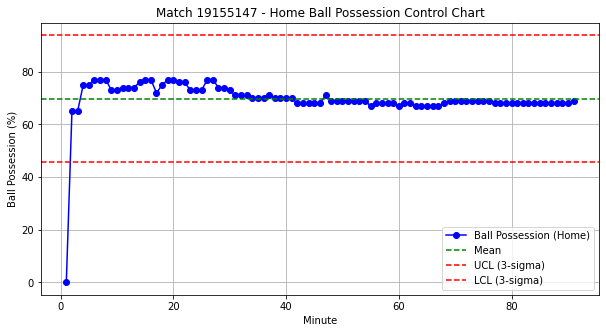

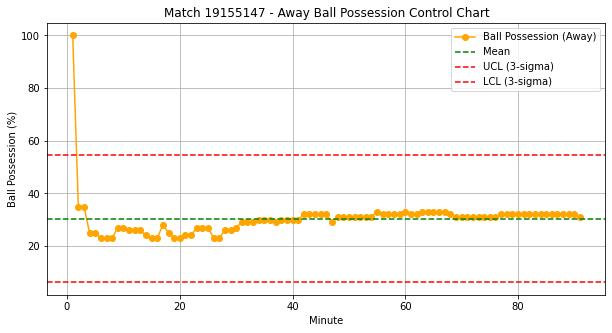

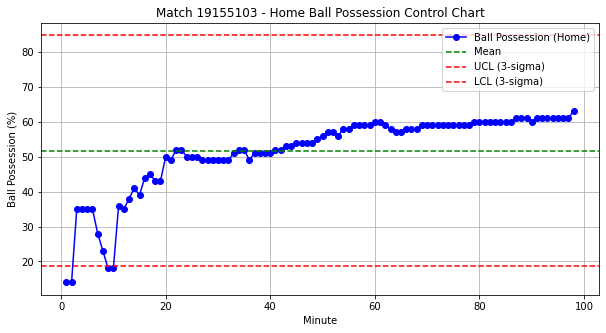

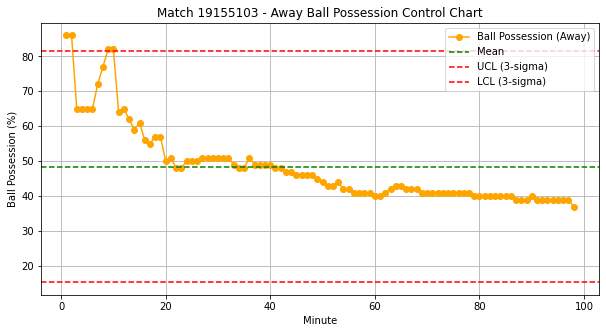

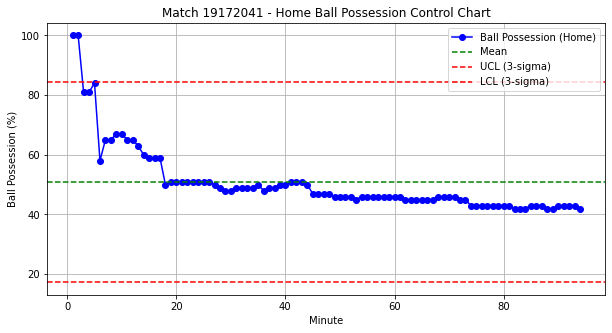

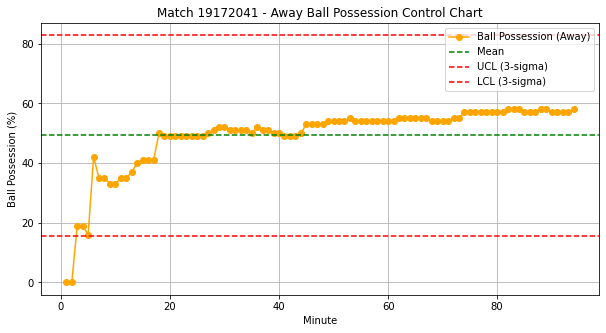

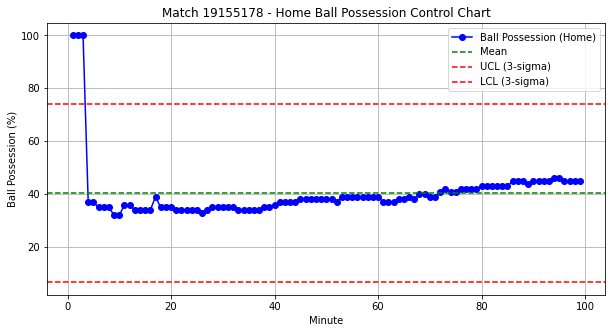

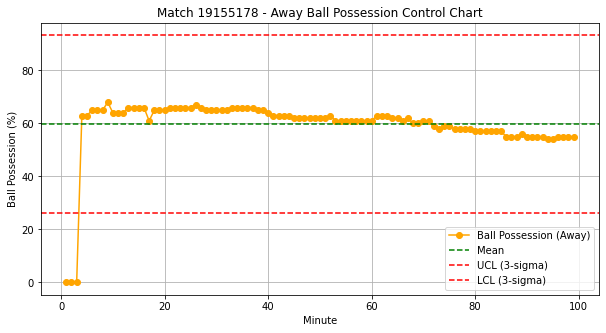

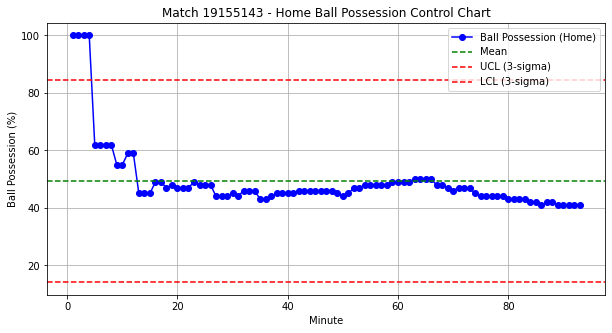

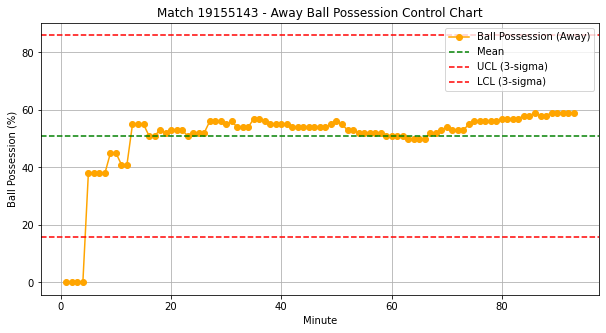

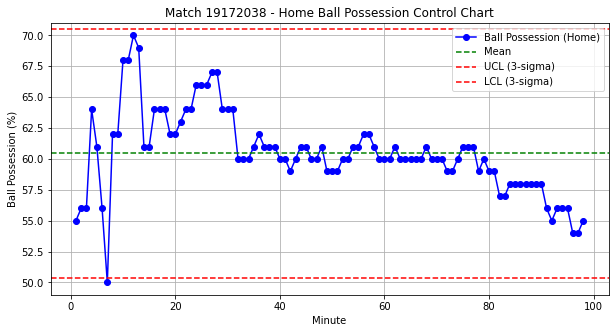

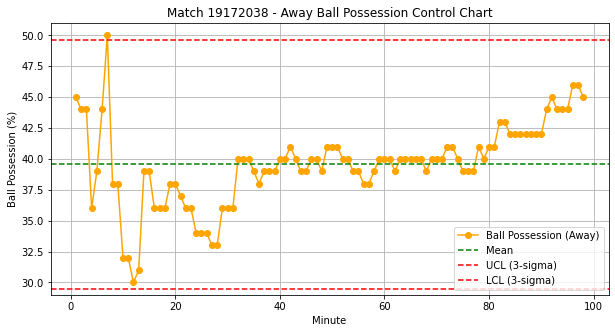

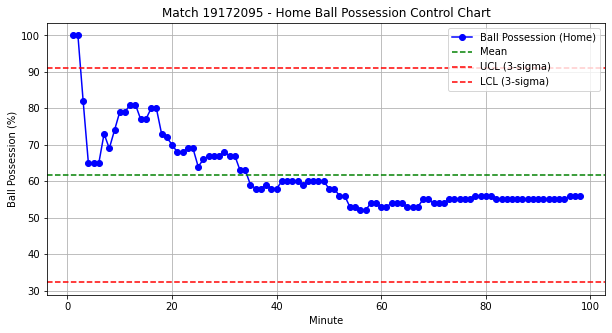

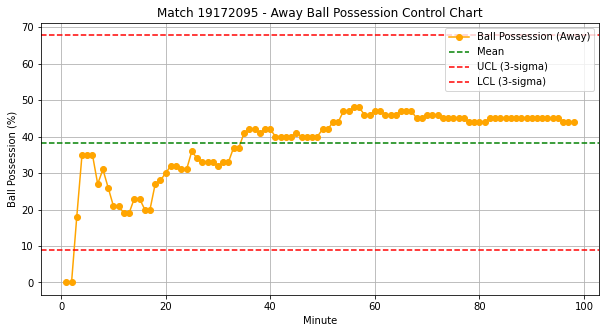

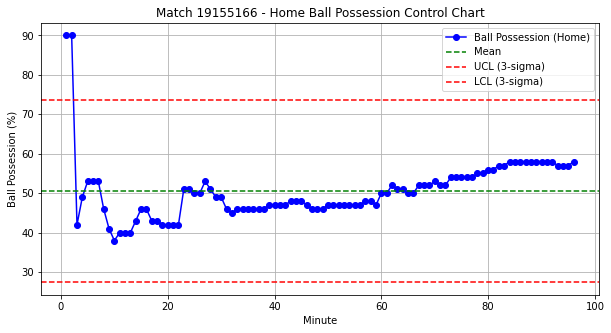

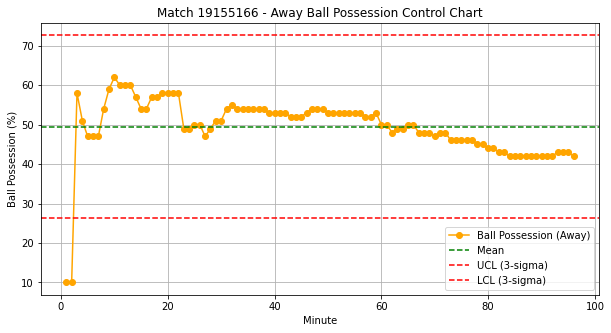

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("ıe423matchdata.csv", encoding='ISO-8859-1')


def calculate_control_limits(series, z=3):
    overall_mean = np.mean(series)
    std_dev = np.std(series)
    upper_limit = overall_mean + z * std_dev
    lower_limit = overall_mean - z * std_dev
    return overall_mean, upper_limit, lower_limit

interesting_matches = {}

for match_id in data['fixture_id'].unique():
    match_data = data[data['fixture_id'] == match_id]


    ball_possession_home = match_data['Ball.Possession_home']
    ball_possession_away = match_data['Ball.Possession_away']

    mean_home, upper_limit_home, lower_limit_home = calculate_control_limits(ball_possession_home)
    mean_away, upper_limit_away, lower_limit_away = calculate_control_limits(ball_possession_away)

 
    out_of_control_home = ((ball_possession_home > upper_limit_home) | (ball_possession_home < lower_limit_home)).sum()
    out_of_control_away = ((ball_possession_away > upper_limit_away) | (ball_possession_away < lower_limit_away)).sum()

    
    events = match_data[['Redcards_home', 'Redcards_away', 'Goals_home', 'Goals_away']].sum().sum()

    
    interest_score = out_of_control_home + out_of_control_away + events

    if interest_score > 0:
        interesting_matches[match_id] = interest_score


sorted_matches = sorted(interesting_matches.items(), key=lambda x: x[1], reverse=True)[:8]
significant_matches = pd.DataFrame(sorted_matches, columns=['fixture_id', 'interest_score'])
print(significant_matches)


for match_id in significant_matches['fixture_id']:
    match_data = data[data['fixture_id'] == match_id]
    
    
    minutes = np.array(match_data['minute'])
    ball_possession_home = np.array(match_data['Ball.Possession_home'])
    ball_possession_away = np.array(match_data['Ball.Possession_away'])
    
    
    mean_home, upper_limit_home, lower_limit_home = calculate_control_limits(ball_possession_home)
    mean_away, upper_limit_away, lower_limit_away = calculate_control_limits(ball_possession_away)
    
    
    plt.figure(figsize=(10, 5))
    plt.plot(minutes, ball_possession_home, label='Ball Possession (Home)', marker='o', color='blue')
    plt.axhline(mean_home, color='green', linestyle='--', label='Mean')
    plt.axhline(upper_limit_home, color='red', linestyle='--', label='UCL (3-sigma)')
    plt.axhline(lower_limit_home, color='red', linestyle='--', label='LCL (3-sigma)')
    plt.title(f'Match {match_id} - Home Ball Possession Control Chart')
    plt.xlabel('Minute')
    plt.ylabel('Ball Possession (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

    
    plt.figure(figsize=(10, 5))
    plt.plot(minutes, ball_possession_away, label='Ball Possession (Away)', marker='o', color='orange')
    plt.axhline(mean_away, color='green', linestyle='--', label='Mean')
    plt.axhline(upper_limit_away, color='red', linestyle='--', label='UCL (3-sigma)')
    plt.axhline(lower_limit_away, color='red', linestyle='--', label='LCL (3-sigma)')
    plt.title(f'Match {match_id} - Away Ball Possession Control Chart')
    plt.xlabel('Minute')
    plt.ylabel('Ball Possession (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


Progress, now control chart was calculated with ball possesion parameter remembering that these are percantages and differencing does not make sense. Built control charts for both home and away team (one almost project the other) for 8 the most "interesting matches"